In [3]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
for dirpath, dirname, filenames in os.walk('COVID_IEEE'):
    print(f'there are {len(filenames)} files in {dirpath}')

there are 0 files in COVID_IEEE
there are 536 files in COVID_IEEE\covid
there are 668 files in COVID_IEEE\normal
there are 619 files in COVID_IEEE\virus


In [5]:
data_dir = pathlib.Path('COVID_IEEE')
class_name = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [6]:
def view_image(target, target_class):
    target_folder = os.path.join(target, target_class)  
    random_image = random.sample(os.listdir(target_folder), 1)[0] 
    print(random_image)  # Print the name of the random image
    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return img

person738_virus_1360.jpeg


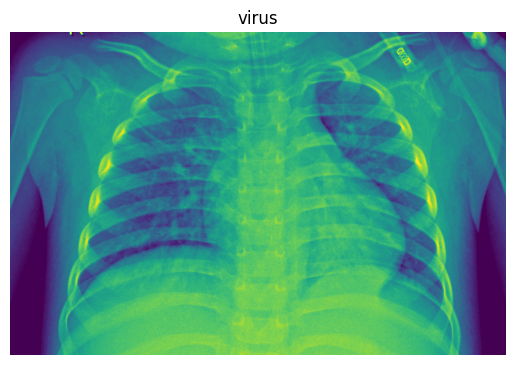

In [7]:
img =  view_image(data_dir, 'virus')

IM-0495-0001.jpeg


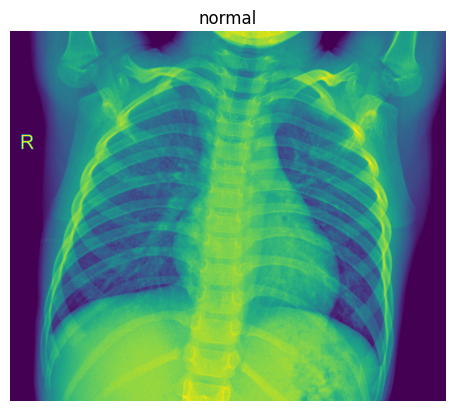

In [8]:
img =  view_image(data_dir, 'normal')

In [9]:
data = []
labels = []

for category, label in zip(['covid', 'normal', 'virus'], [0, 1, 2]):
    category_dir = os.listdir(f"{data_dir}/{category}")
    for image_file in category_dir:
        image_path = f"{data_dir}/{category}/{image_file}"
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (224, 224))
            data.append(image)
            labels.append(label)
        else:
            print(f"Warning: Could not read image {image_path}")

In [10]:
img_data = np.array(data) / 255.0 # this is for normalize the data , i need to devide for 255
img_labels = np.array(labels)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)

In [12]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [40]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32 ,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())


model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))

model.add(Dense(units=3, activation="softmax"))

model.add(Dropout(0.5))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           771 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241,443 (100.10 MB)

 Trainable params: 26,241,379 (100.10 MB)

 Non-trainable params: 64 (256.00 B)

In [42]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3665 - loss: nan - val_accuracy: 0.3836 - val_loss: 1.0913
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4631 - loss: nan - val_accuracy: 0.6027 - val_loss: 1.0148
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5162 - loss: nan - val_accuracy: 0.6804 - val_loss: 0.8984
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5181 - loss: nan - val_accuracy: 0.8288 - val_loss: 0.5226
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5072 - loss: nan - val_accuracy: 0.6986 - val_loss: 0.8127
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5529 - loss: nan - val_accuracy: 0.8881 - val_loss: 0.5378
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4867 - loss: nan - val_accuracy: 0.6164 - val_loss: 1.0086
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5045 - loss: nan - val_accuracy: 0.8196 - val_loss: 0.4421
Epoch 9/15
32/32

Text(0.5, 1.0, 'Training-Validation Accuracy')

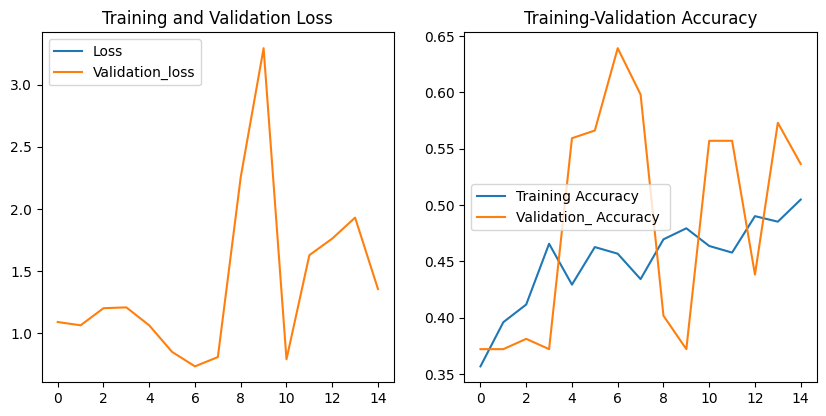

In [28]:

loss = pd.DataFrame(model.history.history)


plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")
     

In [29]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step


In [30]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       108
           1       0.45      0.99      0.62       129
           2       0.50      0.01      0.02       128

    accuracy                           0.56       365
   macro avg       0.63      0.56      0.48       365
weighted avg       0.61      0.56      0.46       365



In [31]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred),
             columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,74,33,1
normal,1,128,0
virus,3,124,1


In [32]:
import tensorflow as tf

weights_path = './mobilenet_1_0_224_tf_no_top.h5'

base_model = tf.keras.applications.MobileNet(input_shape=[224, 224, 3], weights=weights_path, include_top=False)

for layer in base_model.layers:
    layer.trainable = False


In [33]:

model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [36]:

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 55,267,011 (210.83 MB)

 Trainable params: 52,038,147 (198.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [37]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 594ms/step - accuracy: 0.6465 - loss: 17.2620 - val_accuracy: 0.8699 - val_loss: 1.5759
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 556ms/step - accuracy: 0.9035 - loss: 1.3185 - val_accuracy: 0.9292 - val_loss: 2.1041
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 564ms/step - accuracy: 0.9603 - loss: 0.5401 - val_accuracy: 0.9338 - val_loss: 0.7904
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.9919 - loss: 0.1085 - val_accuracy: 0.9566 - val_loss: 0.6075
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.9975 - loss: 0.0201 - val_accuracy: 0.9589 - val_loss: 0.6172
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.9977 - loss: 0.0506 - val_accuracy: 0.9498 - val_loss: 0.7784
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.9974 - loss: 0.0327 - val_accuracy: 0.9543 - val_loss: 0.5247
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 553ms/step - accuracy: 0.9887 - loss: 0.0969 - val_acc

Text(0.5, 1.0, 'Training-Validation Accuracy')

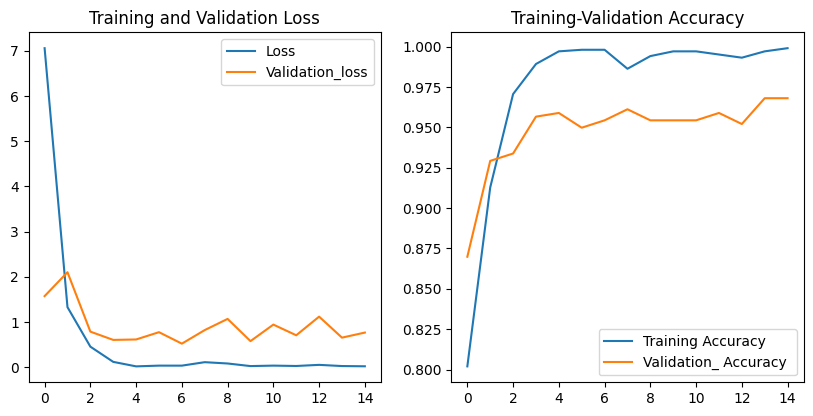

In [38]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [39]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step


In [26]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])
# Save the trained model
model.save('Covid_X_Ray_Predictor.h5')


In [27]:
model.save('my_model.h5')


In [28]:
convertor =  tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convertor.convert()
with open('models/Covid_X_Ray_Predictor.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s/assets


INFO:tensorflow:Assets written to: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s/assets


Saved artifact at '/var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_211')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  10841290512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  10841281872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  10841278224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11347739472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205217104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205214224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205218064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12205217296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  122052

W0000 00:00:1731967567.077555   17268 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1731967567.085138   17268 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-11-18 22:06:07.092355: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s
2024-11-18 22:06:07.095715: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-18 22:06:07.095723: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qf/b5z9z24x5sv7bxspjj6hbvyw0000gn/T/tmptv0o194s
I0000 00:00:1731967567.129861   17268 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-18 22:06:07.136752: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-18 22:06:07.622635: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder